In [2]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
#IMPORT DATASET
crime = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\crime_data (1).csv")

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
#NORMALZATION
crime_norm = StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

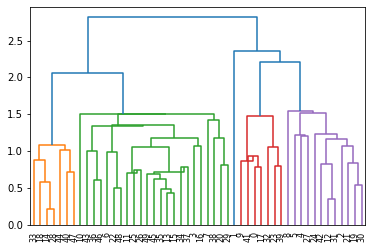

In [9]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='centroid'))

In [10]:
#create cluster
hc = AgglomerativeClustering(n_clusters=3, affinity= 'euclidean' , linkage='average')

In [11]:
y_hc= hc.fit_predict(crime_norm)
Cluster= pd.DataFrame(y_hc,columns=['clusters'])

C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [12]:
crime['h_clusters']= hc.labels_

In [13]:
crime

,Murder,Assault,UrbanPop,Rape,h_clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


    DBSAN CLUSTERING

In [14]:
dbscan= DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [15]:
#Adding cluster to dataset
crime['clusters']=dbscan.labels_

In [16]:
crime

,Murder,Assault,UrbanPop,Rape,h_clusters,clusters
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,2,-1
2,8.1,294,80,31.0,0,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,0,-1
5,7.9,204,78,38.7,0,-1
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,1,-1
8,15.4,335,80,31.9,0,-1
9,17.4,211,60,25.8,0,-1


In [17]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,h_clusters
,,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,0.277778
1,0,14.050000,238.000000,57.750000,23.200000,0.000000
2,1,4.825000,112.035714,63.357143,16.107143,0.964286


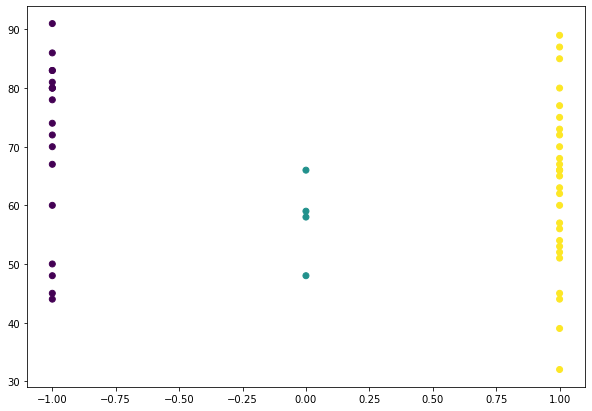

In [20]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_) 

K MEAND CLUSTERING

In [61]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pylab as plt

In [62]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)


C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

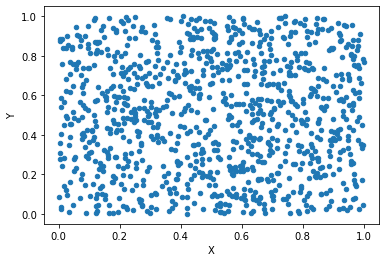

In [63]:
model1 = KMeans(n_clusters=5).fit(crime_norm)
df_xy = pd.DataFrame(columns=["X","Y"])
df_xy.X= X
df_xy.Y= Y
df_xy.plot(x="X", y= "Y", kind="scatter")

In [64]:
    x = np.random.uniform(0,1,1000)
    x

array([0.90304127, 0.6895567 , 0.95122373, 0.98282768, 0.73668088,
       0.41627167, 0.68951943, 0.48344744, 0.49049881, 0.39489741,
       0.75651411, 0.1369087 , 0.26105539, 0.14694865, 0.67574392,
       0.42111851, 0.36132453, 0.09259825, 0.53211182, 0.48096575,
       0.22914177, 0.26940364, 0.1355577 , 0.03157962, 0.5546487 ,
       0.76981711, 0.66981843, 0.65675257, 0.1090377 , 0.89171135,
       0.37671351, 0.33033415, 0.09762078, 0.18111397, 0.77254903,
       0.71632637, 0.78228138, 0.49129614, 0.30786459, 0.31192205,
       0.52273304, 0.38253386, 0.03442838, 0.24297996, 0.13586065,
       0.58698571, 0.21990144, 0.1088006 , 0.45176564, 0.58354822,
       0.85000519, 0.9993059 , 0.58286816, 0.43639688, 0.74495215,
       0.07785851, 0.06107988, 0.58387717, 0.97121162, 0.40630832,
       0.30368637, 0.44956169, 0.19191727, 0.51871548, 0.63275756,
       0.45782026, 0.40325963, 0.1408143 , 0.10649067, 0.85626586,
       0.52616676, 0.90068616, 0.01732285, 0.75192549, 0.17378

C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

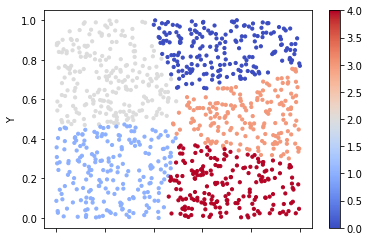

In [65]:
model1 = KMeans(n_clusters=5).fit(df_xy)
df_xy.plot(x="X", y="Y", c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [66]:
def norm_func(i):
    x = (i-i.mean())/(i.max()-i.mean())
    return (x)
#Normalized data frame
df_norm = norm_func(crime.iloc[:,1:])
df_norm.head(10)

,Assault,UrbanPop,Rape,h_clusters,clusters
0,0.392445,-0.296151,-0.001292,-0.470588,-0.25
1,0.554860,-0.688924,0.939438,1.000000,-1.50
2,0.741338,0.567950,0.394380,-0.470588,-1.50
3,0.115736,-0.610369,-0.069929,0.264706,-1.50
4,0.633061,1.000000,0.781977,-0.470588,-1.50
5,0.199952,0.489395,0.705265,-0.470588,-1.50
6,-0.365496,0.450118,-0.409076,0.264706,1.00
7,0.404475,0.253731,-0.219315,0.264706,-1.50
8,0.987969,0.567950,0.430717,-0.470588,-1.50
9,0.242060,-0.217596,0.184432,-0.470588,-1.50


Elbow curve

C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

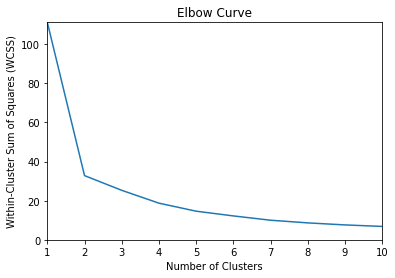

In [81]:
 wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xlim(1, 10)
plt.ylim(0, max(wcss))
plt.show()

In [83]:
# selecting clusters from above records 
model = KMeans(n_clusters=5)
model.fit(df_norm)
model.labels_#getting clusters assinged to each row

C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\Untitled Folder 1\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 0, 3, 0, 3, 3, 2, 0, 3, 0, 3, 1, 3, 2, 1, 2, 1, 4, 1, 3, 2, 3,
       2, 0, 2, 1, 2, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 2, 2, 4, 1, 4, 3, 2,
       1, 2, 2, 1, 2, 2])

In [85]:
md = pd.Series(model.labels_) # converting numpy array into pandas series
crime['clusters']=md #creting new column
crime

,Murder,Assault,UrbanPop,Rape,h_clusters,clusters
0,13.2,236,58,21.2,0,4
1,10.0,263,48,44.5,2,0
2,8.1,294,80,31.0,0,3
3,8.8,190,50,19.5,1,0
4,9.0,276,91,40.6,0,3
5,7.9,204,78,38.7,0,3
6,3.3,110,77,11.1,1,2
7,5.9,238,72,15.8,1,0
8,15.4,335,80,31.9,0,3
9,17.4,211,60,25.8,0,0
